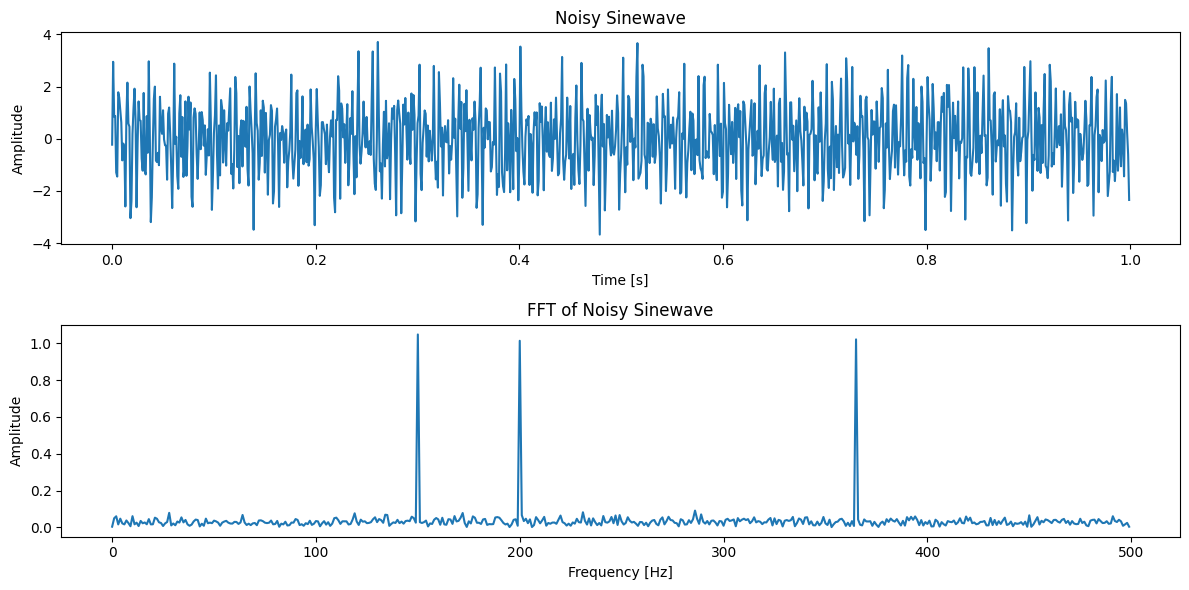

In [7]:
import numpy as np
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
import xarray as xr

sampling_rate = 1000  # Samples per second
T = 1.0               # Duration in seconds
f1 = 150.0              # Frequency of the sinewave (Hz)
f2 = 200.0
f3 = 365.0
 # Time vector
t = np.linspace(0.0, T, int(T * sampling_rate), endpoint=False)
sinewave = np.sin(2 * np.pi * f1 * t) +  np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t) # Create the sinewave

# Add some random noise to the sinewave
noise = np.random.normal(0, 0.5, size=t.shape)
noisy_sinewave = sinewave + noise

# Perform the FFT
N = len(noisy_sinewave)
yf = fft(noisy_sinewave)
xf = fftfreq(N, 1 / sampling_rate)

# Plot the noisy sinewave
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_sinewave)
plt.title('Noisy Sinewave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the magnitude of the FFT
plt.subplot(2, 1, 2)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))  # Only plot the positive frequencies
plt.title('FFT of Noisy Sinewave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [4]:
import netcdf4

ModuleNotFoundError: No module named 'netcdf4'

In [9]:
import netcdf4

ModuleNotFoundError: No module named 'netcdf4'

In [10]:
pip install netcdf4


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
ds = xr.open_dataset("processed_file.nc")

In [12]:
ds


<xarray.Dataset> Size: 2MB
Dimensions:  (depth: 27, time: 3170)
Coordinates:
  * depth    (depth) float32 108B 0.0 16.0 32.0 48.0 ... 368.0 384.0 400.0 416.0
  * time     (time) datetime64[ns] 25kB 2017-10-11T22:00:00 ... 2018-02-20T23...
Data variables:
    u        (time, depth) float32 342kB ...
    v        (time, depth) float32 342kB ...
    w        (time, depth) float32 342kB ...
    err      (time, depth) float32 342kB ...
    mask     (time, depth) float32 342kB ...
Attributes:
    mask_applied:  True

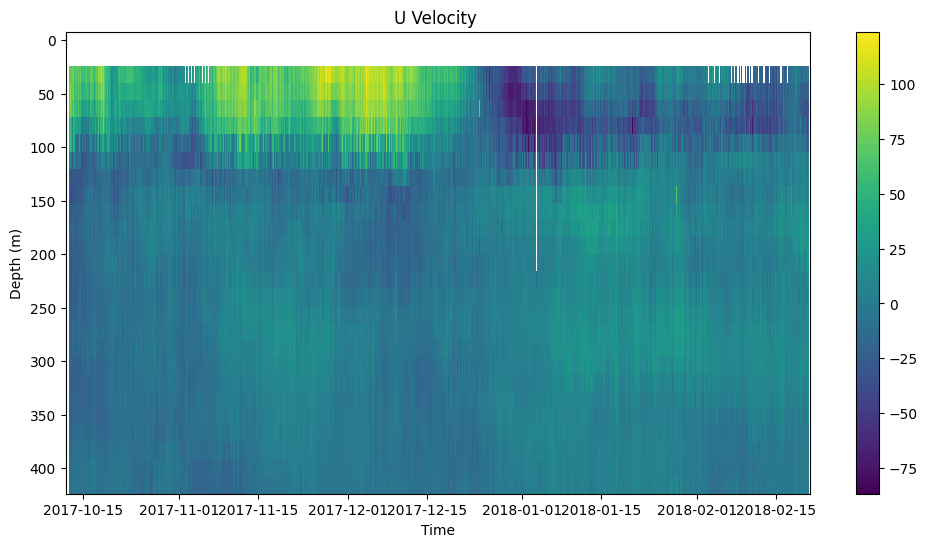

In [13]:
u_data = ds['u'] # You can see the variable in the previous output
depth = ds['depth'].values
time = ds['time'].values

plt.figure(figsize=(12, 6)) # Plot the heatmap using pcolormesh
 # Use pcolormesh for coordinate-based plotting
plt.pcolormesh(time, depth, u_data.T, cmap='viridis', shading='auto')
# Add colorbar and labels
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.title('U Velocity ')
plt.gca().invert_yaxis() # Invert the y-axis to show depth increasing downwards
plt.show() # Show the plot


In [14]:
ds=pyadps.ReadFile('demo.000')

NameError: name 'pyadps' is not defined

In [15]:
import pyadps

In [16]:
ds=pyadps.ReadFile('demo.000')


In [17]:
ds

In [18]:
ds.velocity.data

array([[[ -1242, -32768, -32768, ...,    -18,    -45,      3],
        [-32768, -32768, -32768, ...,     -1,    -37,      9],
        [-32768, -32768, -32768, ...,      3,    -17,      4],
        ...,
        [-32768, -32768, -32768, ...,   -799,   -602,   -721],
        [-32768, -32768, -32768, ...,   -800,   -559,   -608],
        [-32768, -32768, -32768, ...,   -347,   -330,   -391]],

       [[  -375, -32768, -32768, ...,     84,     67,     73],
        [-32768, -32768, -32768, ...,     76,     27,     50],
        [-32768, -32768, -32768, ...,     11,    -39,     70],
        ...,
        [-32768, -32768, -32768, ...,  -2061,  -2006,  -1674],
        [-32768, -32768, -32768, ...,  -1766,  -1729,  -1652],
        [-32768, -32768, -32768, ...,   -745,   -743,   -890]],

       [[  -303, -32768, -32768, ...,      0,     11,     13],
        [-32768, -32768, -32768, ...,      1,      9,      9],
        [-32768, -32768, -32768, ...,      1,     10,     14],
        ...,
        [-32

In [19]:
print('Velocity units: ', ds.velocity.unit)
print('Missing values: ', ds.velocity.missing_value)


Velocity units:  mm/s
Missing values:  -32768


In [20]:
print(ds.depth[0:5])

[416.04 400.04 384.04 368.04 352.04]


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
import xarray as xr

X, Y = np.meshgrid(ds.time, ds.depth)
#  Build a plot function
def fillplot(data, beam=0):
    X, Y = np.meshgrid(ds.time, ds.depth)
    levels = np.arange(-150, 150, 20)
    cs = plt.contourf(X, Y, data[beam, :, :]/10, 
                  cmap ="coolwarm", levels=levels, extend="both") 
    ax = cs.axes
    ax.invert_yaxis()
    plt.title("Zonal Velocity")
    plt.colorbar(cs)
    plt.show()